## Imports

In [1]:
from pathlib import Path
import time

import torch
from torchinfo import summary

from tfvspt.config.config import get_config
from tfvspt.pt.data import ClassificationDataset
from tfvspt.pt.data import get_dataloader
from tfvspt.pt.data import get_transforms
from tfvspt.pt.model import Model
from tfvspt.pt.train import train_model
from tfvspt.pt.utils import plot_history
from tfvspt.pt.utils import plot_images
from tfvspt.pt.utils import set_seed
from tfvspt.tf.data import Dataset as TFDataset

/home/meet.ranoliya/workspace/tf_pt_benchmarking/tfvspt/pt/train.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2025-03-20 10:37:57.061309: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-20 10:37:57.072912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742447277.086335   10794 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742447277.090246   10794 cuda_blas.cc:1407] Unable to register

## Read Config

In [2]:
config = get_config("../../assets/config.yaml")
config

Config(seed=25, n_classes=100, bs=32, imgsz=(32, 32), lr=0.001, epochs=20, num_workers=0, output='./output')

## Set Seed

In [3]:
set_seed(config.seed)

## Dataset

### Name: CIFAR100

In [4]:
(x_train, y_train), (x_test, y_test) = TFDataset.get_data()
print(f"[PT] Traindata size: {len(x_train)}")

[PT] Traindata size: 50000


In [5]:
st = time.time()
train_ds = ClassificationDataset(config=config, images=x_train, labels=y_train, transforms=get_transforms(data="train"))
train_dataloader = get_dataloader(dataset=train_ds, data="train", config=config)
print(f"[PT] Dataset loading time: {time.time() - st}")

[PT] Dataset loading time: 0.0002892017364501953


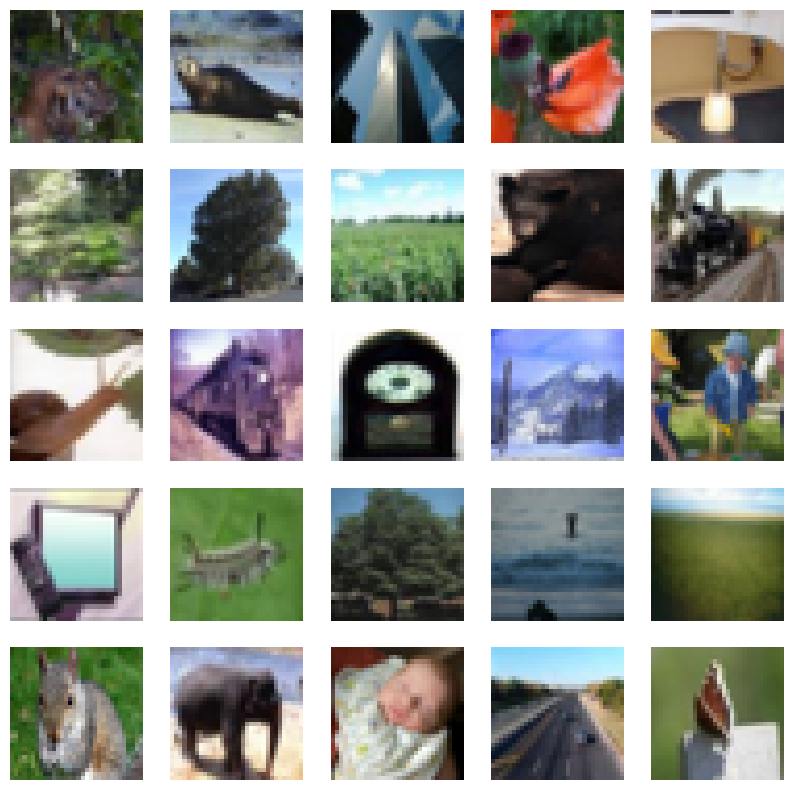

In [6]:
plot_images(train_dataloader)

## Model

In [7]:
st = time.time()
model = Model(n_classes=config.n_classes)
print(f"[PT] Model loading time: {time.time() - st}")
summary(model, input_size=(config.bs, 3, *config.imgsz))

[PT] Model loading time: 0.006042957305908203


Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [32, 100]                 --
├─Sequential: 1-1                        [32, 128, 4, 4]           --
│    └─Conv2d: 2-1                       [32, 32, 32, 32]          896
│    └─BatchNorm2d: 2-2                  [32, 32, 32, 32]          64
│    └─ReLU: 2-3                         [32, 32, 32, 32]          --
│    └─MaxPool2d: 2-4                    [32, 32, 16, 16]          --
│    └─Conv2d: 2-5                       [32, 64, 16, 16]          18,496
│    └─BatchNorm2d: 2-6                  [32, 64, 16, 16]          128
│    └─ReLU: 2-7                         [32, 64, 16, 16]          --
│    └─MaxPool2d: 2-8                    [32, 64, 8, 8]            --
│    └─Conv2d: 2-9                       [32, 128, 8, 8]           73,856
│    └─BatchNorm2d: 2-10                 [32, 128, 8, 8]           256
│    └─ReLU: 2-11                        [32, 128, 8, 8]           --
│   

## Train

In [8]:
output_path = Path(config.output) / "pt"
output_path.mkdir(parents=True, exist_ok=True)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device Selected: {device}")
optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)
criterion = torch.nn.CrossEntropyLoss()

Device Selected: cpu


In [10]:
st = time.time()
history = train_model(
    dataloader=train_dataloader,
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    config=config,
    device=device,
)
print(f"[PT] Training time: {time.time() - st}")

Epoch 1 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:42<00:00, 36.92it/s]


Epoch 1/20, Loss: 3.599246293706766, Accuracy: 0.1406


Epoch 2 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:45<00:00, 34.23it/s]


Epoch 2/20, Loss: 2.985980004892087, Accuracy: 0.2458


Epoch 3 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:49<00:00, 31.28it/s]


Epoch 3/20, Loss: 2.7145111965812787, Accuracy: 0.2991


Epoch 4 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:46<00:00, 33.63it/s]


Epoch 4/20, Loss: 2.526905861331039, Accuracy: 0.3396


Epoch 5 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:52<00:00, 30.03it/s]


Epoch 5/20, Loss: 2.386696925623937, Accuracy: 0.365


Epoch 6 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:44<00:00, 35.15it/s]


Epoch 6/20, Loss: 2.2685544724961693, Accuracy: 0.3922


Epoch 7 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:51<00:00, 30.40it/s]


Epoch 7/20, Loss: 2.1684138697839592, Accuracy: 0.4175


Epoch 8 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:47<00:00, 32.69it/s]


Epoch 8/20, Loss: 2.0855650893404785, Accuracy: 0.4336


Epoch 9 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:49<00:00, 31.71it/s]


Epoch 9/20, Loss: 2.0035568024207597, Accuracy: 0.455


Epoch 10 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:53<00:00, 29.25it/s]


Epoch 10/20, Loss: 1.941395169790174, Accuracy: 0.4662


Epoch 11 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:44<00:00, 35.21it/s]


Epoch 11/20, Loss: 1.8768491389579065, Accuracy: 0.482


Epoch 12 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:43<00:00, 36.08it/s]


Epoch 12/20, Loss: 1.829061239786203, Accuracy: 0.4941


Epoch 13 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:48<00:00, 32.51it/s]


Epoch 13/20, Loss: 1.7745277791624259, Accuracy: 0.5065


Epoch 14 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:42<00:00, 36.62it/s]


Epoch 14/20, Loss: 1.7225741607900316, Accuracy: 0.5169


Epoch 15 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:47<00:00, 32.64it/s]


Epoch 15/20, Loss: 1.6740848422431824, Accuracy: 0.5282


Epoch 16 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:53<00:00, 29.00it/s]


Epoch 16/20, Loss: 1.6345876585727919, Accuracy: 0.5389


Epoch 17 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:47<00:00, 32.95it/s]


Epoch 17/20, Loss: 1.5888635097828265, Accuracy: 0.5478


Epoch 18 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:52<00:00, 30.04it/s]


Epoch 18/20, Loss: 1.5566429326493085, Accuracy: 0.5545


Epoch 19 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:44<00:00, 34.82it/s]


Epoch 19/20, Loss: 1.5074093909272763, Accuracy: 0.5712


Epoch 20 / 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1563/1563 [00:50<00:00, 30.76it/s]

Epoch 20/20, Loss: 1.4741765901741888, Accuracy: 0.5774


[PT] Training time: 958.3622155189514


## Visualize Training History

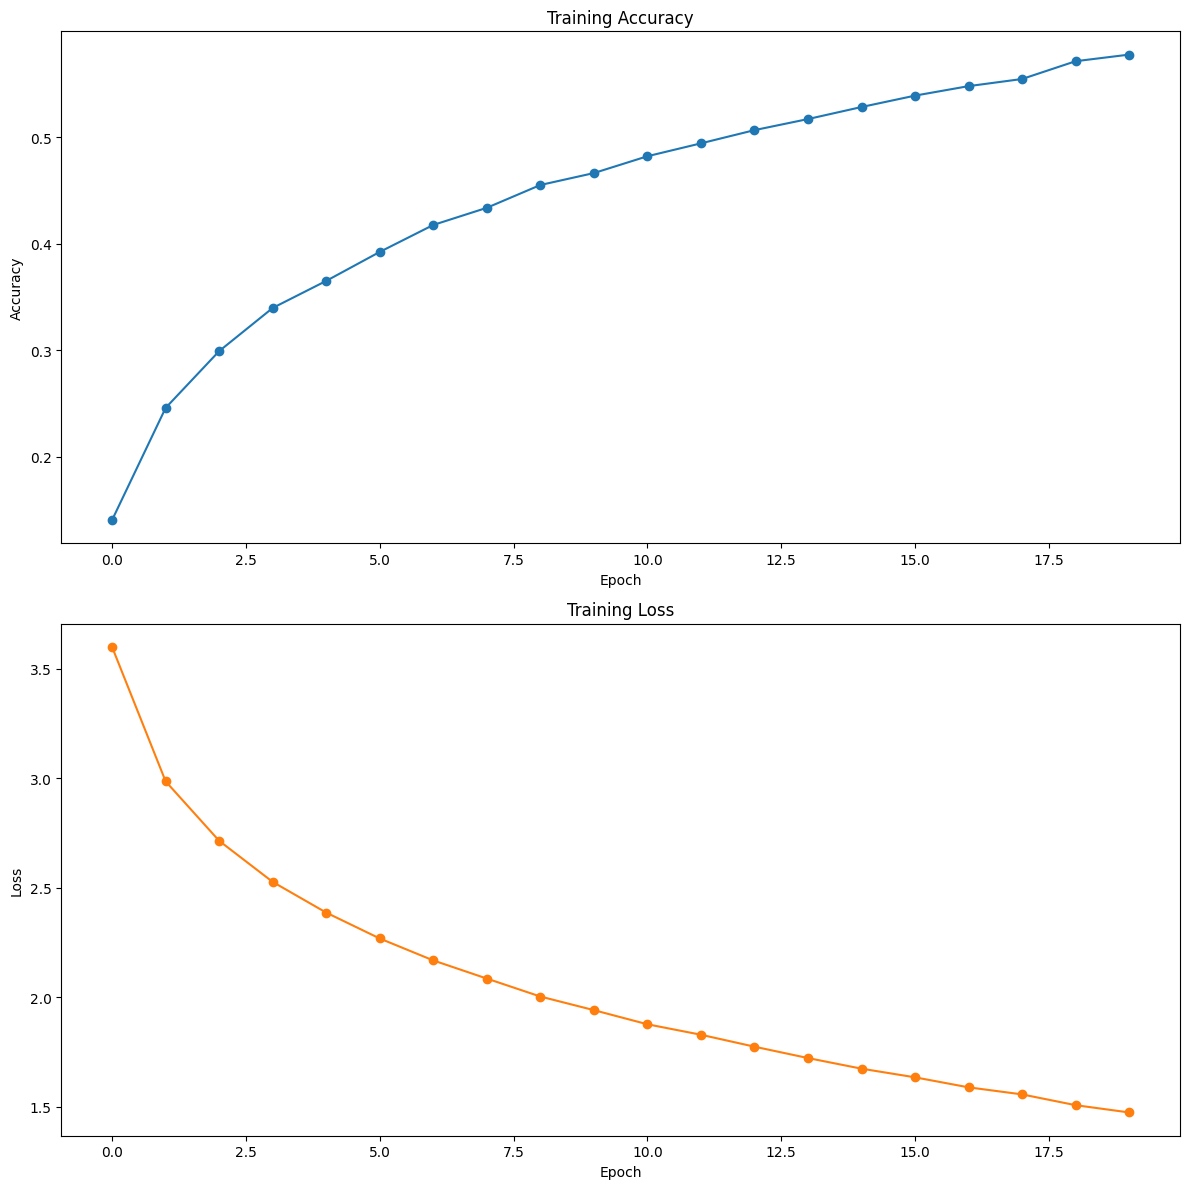

In [11]:
plot_history(history)

## Save Model

In [12]:
st = time.time()
torch.jit.script(model).save(str(output_path / "cifar100.pt"))
print(f"[PT] Model Saving time: {time.time() - st}")

[PT] Model Saving time: 0.07896971702575684
